# Python 11 Debugging

[course link](https://swcarpentry.github.io/python-novice-inflammation/)

- duration: 30 mins
- How can I debug my program ?

### syntax

``` python
if condition: 
    ... 
elif condition: 
    ... 
elif condition:
    ...
else 
    ...
```

In [1]:
### a simple example
### note that conditions are boolean values: True, False
print('start')
if True:
    print('condition 1')
elif True:
    print('condition 2')
elif True:
    print('condition 3')
else:
    print('condition 4')
print('done')

start
condition 1
done


### question
- what is the output of the code block?
- how can I modify the code to output `condition 2`?
- how can I modify the code to output `condition 3`?
- how can I modify the code to output `condition 4`?

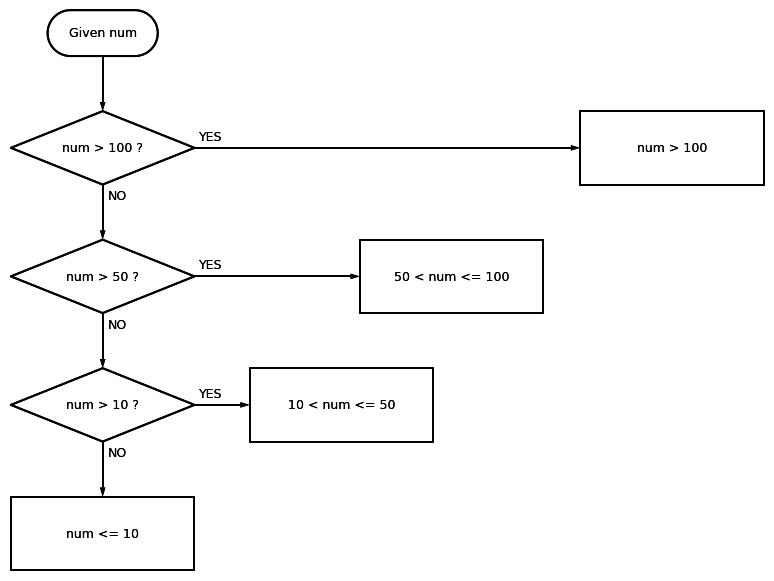

In [2]:
import schemdraw
import schemdraw.flow as flow
import schemdraw.elements as elm

with schemdraw.Drawing(file='diagrams/conditions-01.svg') as d:
    d.config(fontsize=14, inches_per_unit=0.6)
    d += (b := flow.Start().label('Given num'))
    d += flow.Arrow().down(d.unit/2)
    d += (d1 := flow.Decision(w=5, h=2, E='YES', S='NO').label('num > 100 ?'))
    d += flow.Arrow().length(d.unit/2)
    d += (d2 := flow.Decision(w=5, h=2, E='YES', S='NO').label('num > 50 ?'))
    d += flow.Arrow().length(d.unit/2)
    d += (d3 := flow.Decision(w=5, h=2, E='YES', S='NO').label('num > 10 ?'))

    d += flow.Arrow().right(d.unit/2).at(d3.E)
    d += flow.Box(w=5, h=2).anchor('W').label('10 < num <= 50')
    d += flow.Arrow().down(d.unit/2).at(d3.S)
    d += (listen := flow.Box(w=5, h=2).label('num <= 10'))

    d += flow.Arrow().right(d.unit*3.5).at(d1.E)
    d += (c1 := flow.Box(w=5, h=2).anchor('W').label('num > 100'))
    d += flow.Arrow().right(d.unit*1.5).at(d2.E)
    d += flow.Box(w=5, h=2).anchor('W').label('50 < num <= 100')

### example and exercise

![example and exercise](./diagrams/conditions-01.svg)

In [3]:
num = 37
if num > 100:
    print('num > 100')
elif num > 50:
    print('50 < num <= 100')
elif num > 10:
    print('10 < num <= 50')
else:
    print('num <= 10')
print('end of conditions')

10 < num <= 50
end of conditions


change the value of num to print out all code branches

### complex conditions

``` python
condition1 and condition2 and condition3 ...
condition1 or condition2 or condition3 ...
```

In [4]:
True and True and True

True

In [5]:
True and True and False and True

False

In [6]:
False or True or False

True

In [7]:
False or False or False

False

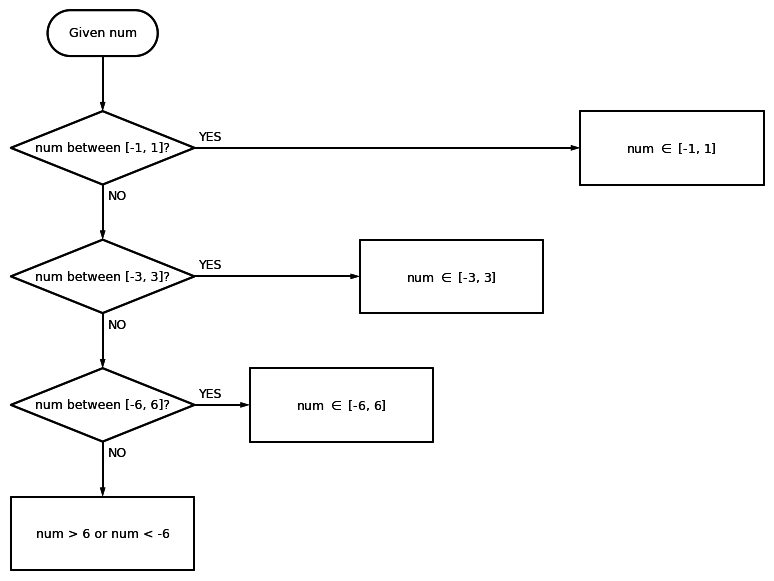

In [8]:
import schemdraw
import schemdraw.flow as flow
import schemdraw.elements as elm
elm.style(elm.STYLE_IEEE)

with schemdraw.Drawing(file='diagrams/conditions-02.svg') as d:
    d.config(fontsize=14, inches_per_unit=0.6)
    d += (b := flow.Start().label('Given num'))
    d += flow.Arrow().down(d.unit/2)
    d += (d1 := flow.Decision(w=5, h=2, E='YES', S='NO').label('num between [-1, 1]?'))
    d += flow.Arrow().length(d.unit/2)
    d += (d2 := flow.Decision(w=5, h=2, E='YES', S='NO').label('num between [-3, 3]?'))
    d += flow.Arrow().length(d.unit/2)
    d += (d3 := flow.Decision(w=5, h=2, E='YES', S='NO').label('num between [-6, 6]?'))

    d += flow.Arrow().right(d.unit/2).at(d3.E)
    d += flow.Box(w=5, h=2).anchor('W').label('num $\in$ [-6, 6]')
    d += flow.Arrow().down(d.unit/2).at(d3.S)
    d += (listen := flow.Box(w=5, h=2).label('num > 6 or num < -6'))

    d += flow.Arrow().right(d.unit*3.5).at(d1.E)
    d += (c1 := flow.Box(w=5, h=2).anchor('W').label('num $\in$ [-1, 1]'))
    d += flow.Arrow().right(d.unit*1.5).at(d2.E)
    d += flow.Box(w=5, h=2).anchor('W').label('num $\in$ [-3, 3]')

### example and exercise

![example and exercise](./diagrams/conditions-02.svg)

In [9]:
num = 3
if num <= 1 and num >= -1:
    print('num between [-1, 1]')
elif num <= 3 and num >= -3:
    print('num between [-3, 3]')
elif num <= 6 and num >= -6:
    print('num between [-6, 6]')
else:
    print('num > 6 or num < -6')
print('end of conditions')

num between [-3, 3]
end of conditions


change the value of num to print out all branches

### exercise: work with patient data

In [10]:
import os, os.path

if os.path.exists('data/inflammation-01.csv'):
    print('csv data already exists')
else:
    if os.path.exists('python-novice-inflammation-data.zip'):
        print('data zip file already exists')
    else:
        os.system('wget https://swcarpentry.github.io/python-novice-inflammation/data/python-novice-inflammation-data.zip')
    os.system('unzip python-novice-inflammation-data.zip -d ./')

csv data already exists


In [11]:
import numpy

data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

max_inflammation_0 = numpy.max(data, axis=0)[0]
max_inflammation_20 = numpy.max(data, axis=0)[20]

if max_inflammation_0 == 0 and max_inflammation_20 == 20:
    print('Suspicious looking maxima!')
elif numpy.sum(numpy.min(data, axis=0)) == 0:
    print('Minima add up to zero!')
else:
    print('Seems OK!')

Suspicious looking maxima!


change data file to review the output
why the output changed/not changed ?

In [12]:
import numpy

data = numpy.loadtxt(fname='data/inflammation-03.csv', delimiter=',')

max_inflammation_0 = numpy.max(data, axis=0)[0]
max_inflammation_20 = numpy.max(data, axis=0)[20]

if max_inflammation_0 == 0 and max_inflammation_20 == 20:
    print('Suspicious looking maxima!')
elif numpy.sum(numpy.min(data, axis=0)) == 0:
    print('Minima add up to zero!')
else:
    print('Seems OK!')

Minima add up to zero!


### exercise: How Many Paths?

Which of the following would be printed if you were to run this code? 
Why did you pick this answer?

- A
- B
- C
- B and C

In [13]:
if 4 > 5:
    print('A')
elif 4 == 5:
    print('B')
elif 4 < 5:
    print('C')

C


### exercise: What Is True?

which statement gets printed ?

In [14]:
if '':
    print('empty string is true')
if 'word':
    print('word is true')
if []:
    print('empty list is true')
if [1, 2, 3]:
    print('non-empty list is true')
if 0:
    print('zero is true')
if 1:
    print('one is true')

word is true
non-empty list is true
one is true


### exercise: Close Enough

Write some conditions that print True if the variable `a` is within 10% of the variable `b` and False otherwise. 

do you get the same answer for all possible pairs of numbers?

In [15]:
a = 5
b = 5.1

if abs(a - b) <= 0.1 * abs(b):
    print('True')
else:
    print('False')

True


### exercise: Counting Vowels

1. Write a loop that counts the number of vowels in a character string.
2. Test it on a few individual words and full sentences.
3. Once you are done, compare your solution to your neighbor’s. Did you make the same decisions about how to handle the letter ‘y’ (which some people think is a vowel, and some do not)?

In [16]:
vowels = 'aeiouAEIOU'
sentence = 'Mary had a little lamb.'
count = 0
for char in sentence:
    if char in vowels:
        count += 1

print('The number of vowels in this string is ' + str(count))

The number of vowels in this string is 6
